In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

In [2]:
driver=webdriver.Chrome(ChromeDriverManager().install())
driver.get('http://www.google.com')
driver.maximize_window()
time.sleep(3)
driver.find_element_by_name("q").send_keys('worldometer coronavirus')
time.sleep(2)
driver.find_element_by_name("btnK").click()
time.sleep(3)
driver.find_element_by_xpath("//div[@class='yuRUbf']/a").click()
time.sleep(9)
driver.find_element_by_xpath("//a[@class='cc-btn cc-dismiss']").click()
time.sleep(3)
driver.find_element_by_xpath("//li[@id='nav-weekly-trends']/a").click()
time.sleep(2)



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Get LATEST driver version for 91.0.4472
Trying to download new driver from https://chromedriver.storage.googleapis.com/91.0.4472.101/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\ANKASHA\.wdm\drivers\chromedriver\win32\91.0.4472.101]


In [3]:
sr=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[1]")
countries=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr/td/a")
cases_7day=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[3]")
cases_preceding7day=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[4]")
weekly_change=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[5]")
deaths_7day=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[7]")
deaths_preceding7day=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[8]")
deaths_weekly_change=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[9]")
pop=driver.find_elements_by_xpath("//table[@id='main_table_countries_today']/tbody/tr[@class='odd' or @class='even']/td[11]")

In [4]:
sr_no=[]
for i in sr:
    a=(i.text)
    sr_no.append(a)

In [5]:
country=[]
for j in countries:
    b=(j.text)
    country.append(b)

In [6]:
cases_7days=[]
for k in cases_7day:
    c=(k.text)
    cases_7days.append(c)

In [7]:
cases_preceding7days=[]
for l in cases_preceding7day:
    d=(l.text)
    cases_preceding7days.append(d)

In [8]:
weekly_change_per=[]
for m in weekly_change:
    e=(m.text)
    weekly_change_per.append(e)

In [9]:
deaths_7days=[]
for n in deaths_7day:
    f=(n.text)
    deaths_7days.append(f)

In [10]:
deaths_preceding7days=[]
for o in cases_preceding7day:
    g=(o.text)
    deaths_preceding7days.append(g)

In [11]:
deaths_weekly_change_per=[]
for p in deaths_weekly_change:
    h=(p.text)
    deaths_weekly_change_per.append(h)

In [12]:
population=[]
for q in pop:
    i=(q.text)
    population.append(i)

In [13]:
driver.quit()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
data={'Sr no':sr_no,'Country':country,'Cases in last 7 days':cases_7days,'Cases in preceding 7 days':cases_preceding7days,'Weekly case % change':weekly_change_per,'Deaths in last 7 days':deaths_7days,'Deaths in preceding 7 days':deaths_preceding7days,'Weekly death % change':deaths_weekly_change_per,'Population':population}

In [16]:
df=pd.DataFrame(data)

In [17]:
df.head()

,Sr no,Country,Cases in last 7 days,Cases in preceding 7 days,Weekly case % change,Deaths in last 7 days,Deaths in preceding 7 days,Weekly death % change,Population
0,1,Brazil,"320,132","349,210",-8%,"9,071","349,210",-17%,"214,108,050"
1,2,India,"289,035","305,909",-6%,"6,034","305,909",+1%,"1,393,901,660"
2,3,Indonesia,"243,119","168,780",+44%,"5,882","168,780",+71%,"276,485,705"
3,4,UK,"218,030","170,856",+28%,203,"170,856",+66%,"68,251,655"
4,5,Russia,"172,392","159,650",+8%,"5,077","159,650",+9%,"145,998,686"


In [18]:
df.to_csv('Weeklycovid19_data.csv',index=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr no                       204 non-null    object
 1   Country                     204 non-null    object
 2   Cases in last 7 days        204 non-null    object
 3   Cases in preceding 7 days   204 non-null    object
 4   Weekly case % change        204 non-null    object
 5   Deaths in last 7 days       204 non-null    object
 6   Deaths in preceding 7 days  204 non-null    object
 7   Weekly death % change       204 non-null    object
 8   Population                  204 non-null    object
dtypes: object(9)
memory usage: 14.5+ KB


In [20]:
df['Sr no']=df['Sr no'].astype(int)

In [21]:
df["Cases in last 7 days"]=df["Cases in last 7 days"].str.replace(',','').astype(int)

In [22]:
df["Cases in preceding 7 days"]=df["Cases in preceding 7 days"].str.replace(',','').astype(int)

In [23]:
df["Deaths in last 7 days"]=df["Deaths in last 7 days"].str.replace(',','').astype(int)

In [24]:
df["Deaths in preceding 7 days"]=df["Deaths in preceding 7 days"].str.replace(',','').astype(int)

In [25]:
df["Population"]=df["Population"].str.replace(',','').astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr no                       204 non-null    int32 
 1   Country                     204 non-null    object
 2   Cases in last 7 days        204 non-null    int32 
 3   Cases in preceding 7 days   204 non-null    int32 
 4   Weekly case % change        204 non-null    object
 5   Deaths in last 7 days       204 non-null    int32 
 6   Deaths in preceding 7 days  204 non-null    int32 
 7   Weekly death % change       204 non-null    object
 8   Population                  204 non-null    int32 
dtypes: int32(6), object(3)
memory usage: 9.7+ KB


In [27]:
df.describe()

,Sr no,Cases in last 7 days,Cases in preceding 7 days,Deaths in last 7 days,Deaths in preceding 7 days,Population
count,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02
mean,102.500000,14815.446078,13339.862745,267.093137,13339.862745,3.812999e+07
std,59.033889,44469.258641,43072.738747,1010.836091,43072.738747,1.455217e+08
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.514000e+04
25%,51.750000,93.750000,70.500000,1.000000,70.500000,1.259542e+06
50%,102.500000,706.500000,609.000000,9.000000,609.000000,7.471442e+06
75%,153.250000,7923.500000,6049.250000,78.750000,6049.250000,2.708862e+07
max,204.000000,320132.000000,349210.000000,9071.000000,349210.000000,1.445024e+09


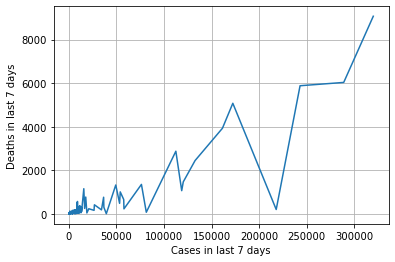

In [28]:
x=df["Cases in last 7 days"]
y=df["Deaths in last 7 days"]
plt.plot(x,y)
plt.xlabel("Cases in last 7 days")
plt.ylabel("Deaths in last 7 days")
plt.grid(True)
plt.show()

#### cases have increased in world but nearly 2.2 lacs deaths rate decreased.But after that it gradually started to increase

<AxesSubplot:xlabel='Cases in preceding 7 days', ylabel='Deaths in preceding 7 days'>

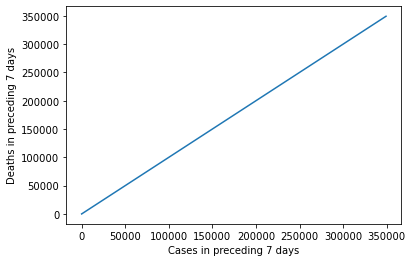

In [30]:
sns.lineplot(data=df,x="Cases in preceding 7 days",y="Deaths in preceding 7 days")

#### cases and deaths are increses linearly

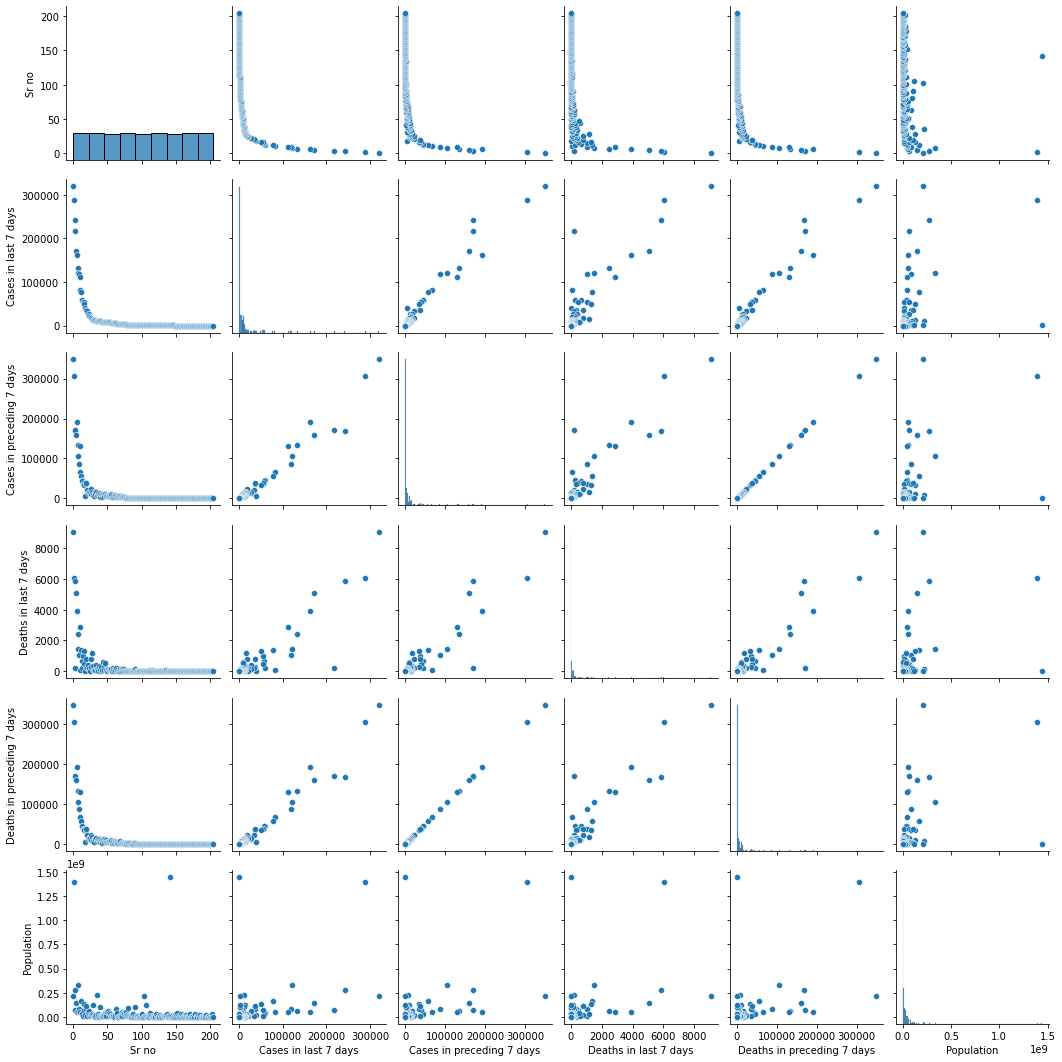

In [32]:
sns.pairplot(data=df)

### How many countries has 0 death in past 7 days

In [33]:
df[df["Deaths in last 7 days"]==0]["Country"].count() 

46

### How many countries has 0 cases in past 7 days

In [34]:
df[df["Cases in last 7 days"]==0]["Country"].count() 

5

### How many people in world affected & not affected by covid in past 7 days

In [35]:
a=sum(df.Population)
b=sum(df["Cases in last 7 days"])

print("Total population in world ->",a)
print("Not affected ->",a-b)                                
print("Affected ->",b)

Total population in world -> 7778518173
Not affected -> 7775495822
Affected -> 3022351


### How many people not affected by covid in past 7 days in india

In [36]:
x=sum(df[df.Country=="India"]["Population"])
y=sum(df[df.Country=="India"]["Cases in last 7 days"])

x-y                                                  

1393612625

### Conclusion:-
1) Automate chrome driver.And extract Weekly covid data just by one click

2)Extract data and convert it into CSV.

3)Cases in last 7 days have increased in world but nearly 2.2 lacs deaths rate decreased.But after that it gradually started to increase again.

4)Cases in preceding 7 days and Deaths in preceding 7 days are increase linearly.

5) 46 countries has 0 death in past 7 days.

6) 5 countries has 0 cases in past 7 days.

7) 7775495822 people in world not affected by covid in past 7 days.

8) 1393612625 people not affected by covid in past 7 days in india.

## Thank You!